# Import Necessary Libraries

In [2]:
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load and Explore Dataset

We are using the IMDb 50K movie reviews dataset to classify reviews as positive or negative.

In [3]:
# Load dataset
data = pd.read_csv('IMDB Dataset.csv')

# Display first few rows
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data cleaning

In [4]:
from nltk.corpus import stopwords

# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Define stopwords
stop_words = stopwords.words('english')

print(stop_words[:10])  # Just to check the first few stopwords

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


In [6]:
# Initialize stemmer
stemmer = PorterStemmer()

# Function to clean text
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'<br />', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text) # Remove special characters
    text = text.split() # Tokenize words
    text = [stemmer.stem(word) for word in text if word not in stop_words]  # Stemming & stopword removal
    
    return ' '.join(text)

# Apply text cleaning to reviews
data['cleaned_review'] = data['review'].apply(clean_text)

# Show cleaned data
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


# Convert sentiment labels to binary (positve = 1, negative = 0)

In [7]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Splitting Data into Trsining and Testing Sets

We split the dataset into 40,000 reviews for training and 10,000 for testing 


In [8]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42)

# Print dataset size
print(f"Training Data; {len(X_train)} reviws")
print(f"Testing Data; {len(X_test)} reviws")

Training Data; 40000 reviws
Testing Data; 10000 reviws


# Text Vectorization using TF-IDF

We convert text data into numerical format using TF-IDF

In [9]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# check shape 
print(f"Training TF-IDF shape: {X_train_tfidf.shape}")
print(f"Testing TF-IDF shape: {X_test_tfidf.shape}")

Training TF-IDF shape: (40000, 5000)
Testing TF-IDF shape: (10000, 5000)


# Train Logistic Regression Model

We train a logistic regression model to classify sentiment.

In [10]:
# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

# Checking training accuracy

In [12]:
# Check training accuracy
train_accuracy = model.score(X_train_tfidf, y_train)
test_accuracy = model.score(X_test_tfidf, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9101
Testing Accuracy: 0.8861


# Model Evaluation

In [13]:
# Prediction 
y_pred = model.predict(X_test_tfidf)

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[4314  647]
 [ 492 4547]]


# Sentiment prediction on New Reviews

We test the model with new unseen reviews.

In [15]:
# Function to predict sentiment
def predict_sentiment(review):
    review_cleaned = clean_text(review) # Clean review
    review_vectorized = vectorizer.transform([review_cleaned]) # Convert to TF-IDF
    prediction = model.predict(review_vectorized)[0] # prdict
    return "Positive" if prediction == 1 else "Negative"

In [16]:
# Example reviews
new_reviews = [
    "This movie was absolutely amazing! I loved every part of it.",
    "I wasted two hours of my life watching this garbage. Terrible film!",
    "An okay movie, not great but not bad either."
]

# predict 
for review in new_reviews:
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predict_sentiment(review)}\n")

Review: This movie was absolutely amazing! I loved every part of it.
Predicted Sentiment: Positive

Review: I wasted two hours of my life watching this garbage. Terrible film!
Predicted Sentiment: Negative

Review: An okay movie, not great but not bad either.
Predicted Sentiment: Negative



# Model Evaluation 📊

We will evaluate the model using accuracy, a confusion matrix, and a classification report.

Accuracy: 0.89


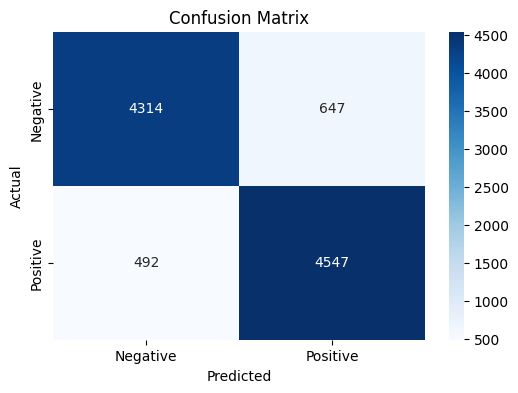


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [17]:
# Transform test data
X_test_transformed = vectorizer.transform(X_test)

# Predict sentiment
y_pred = model.predict(X_test_transformed)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Sentiment Visualization 📊

we will create visualizations to better understand the sentiment distribution in the dataset. This helps in identifying any class imbalances or trends in the data.

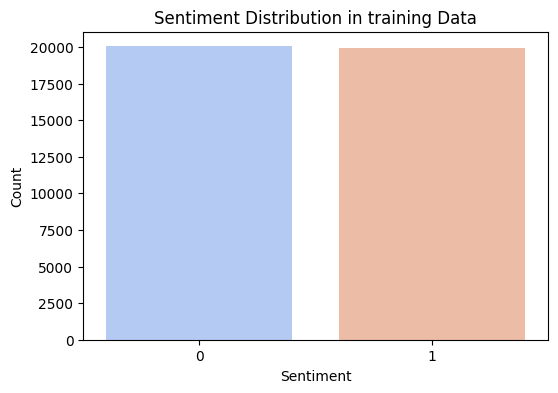

In [25]:
# plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, hue=y_train, palette="coolwarm", legend=False)
plt.title("Sentiment Distribution in training Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()